In [1]:
import pandas as pd
import os

# 경로 지정
data_path = 'segment_dataset'
train_file = os.path.join(data_path, 'card_train.csv')
test_file = os.path.join(data_path, 'card_test.csv')
submission_file = os.path.join(data_path, 'card_test_submission.csv')

# --------------------------------------------
# 1. 데이터 로드
# --------------------------------------------
try:
    df_train = pd.read_csv(train_file, encoding='utf-8')
except UnicodeDecodeError:
    df_train = pd.read_csv(train_file, encoding='cp949')  # 인코딩 에러 시 대체

df_test = pd.read_csv(test_file, encoding='utf-8', low_memory=False)
df_submission = pd.read_csv(submission_file, encoding='utf-8')

print(f"✅ Train 데이터 shape: {df_train.shape}")
print(f"✅ Test 데이터 shape: {df_test.shape}")
print(f"✅ Submission 샘플 shape: {df_submission.shape}")

# --------------------------------------------
# 2. 컬럼 목록 출력
# --------------------------------------------
print("\n🔹 전체 컬럼 수:", len(df_train.columns))
print("🔹 컬럼 리스트:")
print(df_train.columns.tolist())

# --------------------------------------------
# 3. 변수 분류 로직 정의
# --------------------------------------------

# 기준 키워드 정의
period_keywords = ['B0M', 'R3M', 'R6M', 'R12M']
payment_type_keywords = ['일시불', '할부', 'CA', '카드론', '체크']
info_keywords = ['이용건수', '이용금액']
industry_keywords = ['TOP1', 'TOP2', 'TOP3', '업종']
feature_categories = {
    '기간정보': [],
    '결제유형': [],
    '이용정보': [],
    '업종관련': [],
    '기타': []
}

# 변수 분류
for col in df_train.columns:
    if any(p in col for p in period_keywords):
        feature_categories['기간정보'].append(col)
    elif any(p in col for p in payment_type_keywords):
        feature_categories['결제유형'].append(col)
    elif any(i in col for i in info_keywords):
        feature_categories['이용정보'].append(col)
    elif any(ind in col for ind in industry_keywords):
        feature_categories['업종관련'].append(col)
    else:
        feature_categories['기타'].append(col)

# --------------------------------------------
# 4. 결과 출력
# --------------------------------------------
print("\n📦 변수 분류 결과:")
for category, cols in feature_categories.items():
    print(f"\n✅ {category} ({len(cols)}개)")
    for c in cols:
        print(f"  - {c}")

# --------------------------------------------
# 5. 데이터 타입 및 결측치 확인
# --------------------------------------------
print("\n📊 데이터 타입 및 결측치 확인:")
print(df_train.info())

# --------------------------------------------
# 6. 샘플 출력
# --------------------------------------------
print("\n🔍 데이터 샘플 5개:")
print(df_train.sample(5).T)  # 전치로 보기 편하게 출력



✅ Train 데이터 shape: (70560, 738)
✅ Test 데이터 shape: (1440, 737)
✅ Submission 샘플 shape: (1440, 2)

🔹 전체 컬럼 수: 738
🔹 컬럼 리스트:
['Unnamed: 0.1', '대표결제일', '대표결제방법코드', '대표청구지고객주소구분코드', '대표청구서수령지구분코드', '청구서수령방법', '청구서발송여부_B0', '청구서발송여부_R3M', '청구서발송여부_R6M', '청구금액_B0', '청구금액_R3M', '청구금액_R6M', '포인트_마일리지_건별_B0M', '포인트_마일리지_건별_R3M', '포인트_포인트_건별_B0M', '포인트_포인트_건별_R3M', '포인트_마일리지_월적립_B0M', '포인트_마일리지_월적립_R3M', '포인트_포인트_월적립_B0M', '포인트_포인트_월적립_R3M', '포인트_적립포인트_R12M', '포인트_적립포인트_R3M', '포인트_이용포인트_R12M', '포인트_이용포인트_R3M', '포인트_잔여포인트_B0M', '마일_적립포인트_R12M', '마일_적립포인트_R3M', '마일_이용포인트_R12M', '마일_이용포인트_R3M', '마일_잔여포인트_B0M', '할인건수_R3M', '할인금액_R3M', '할인건수_B0M', '할인금액_B0M', '할인금액_청구서_R3M', '할인금액_청구서_B0M', '상환개월수_결제일_R6M', '상환개월수_결제일_R3M', '선결제건수_R6M', '선결제건수_R3M', '연체건수_R6M', '연체건수_R3M', '혜택수혜금액_R3M', '포인트_마일리지_환산_B0M', '혜택수혜금액', '최초한도금액', '카드이용한도금액', 'CA한도금액', '일시상환론한도금액', '월상환론한도금액', 'CA이자율_할인전', 'CL이자율_할인전', 'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전', 'RV신청일자', 'RV약정청구율', 'RV최소결제비율', '자발한도감액횟수_R12M', '자발한도감액금액_R12M', '자발한도감

In [3]:
import pandas as pd
import os

# 경로 설정
data_path = 'segment_dataset'
train_file = os.path.join(data_path, 'card_train.csv')
test_file = os.path.join(data_path, 'card_test.csv')

# 데이터 불러오기
df = pd.read_csv(train_file)

print(f"✅ 데이터 크기: {df.shape}")

# 1. 결측치 비율 분석
missing_ratio = df.isnull().mean().sort_values(ascending=False)
missing_df = missing_ratio.reset_index()
missing_df.columns = ['column', 'missing_ratio']
print("\n✅ 결측치 비율 상위 20개:")
print(missing_df.head(20))

# 2. 고유값 수가 1개 이하인 컬럼 제거 후보
low_variance_cols = [col for col in df.columns if df[col].nunique() <= 1]
print(f"\n⚠️ 모든 값이 동일한 컬럼 수: {len(low_variance_cols)}")
print("예시:", low_variance_cols[:10])

# 3. 데이터 타입 분류
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = [col for col in df.columns if 'dtm' in col or 'date' in col]

print(f"\n📊 수치형 변수: {len(numeric_cols)}개")
print(f"🧾 범주형 변수: {len(categorical_cols)}개")
print(f"⏰ 날짜형(추정) 변수: {datetime_cols}")

# 4. 시계열 형태 변수 파악 예시: mon_*_1m ~ mon_*_12m
from collections import defaultdict
import re

# 시계열 패턴 기반으로 변수 그룹화
time_series_groups = defaultdict(list)

for col in df.columns:
    match = re.match(r'(.*)_([0-9]+)m$', col)
    if match:
        base, month = match.groups()
        time_series_groups[base].append(col)

# 시계열 구조 변수 그룹 예시 출력
print(f"\n📈 시계열 형태 변수 그룹 수: {len(time_series_groups)}")
for base, cols in list(time_series_groups.items())[:5]:
    print(f"  - {base}: {cols}")

# 5. 변수별 기본 통계 요약 (수치형만)
numeric_summary = df[numeric_cols].describe().T
print("\n📋 수치형 변수 통계 요약 (상위 10개):")
print(numeric_summary.head(10))


✅ 데이터 크기: (70560, 738)

✅ 결측치 비율 상위 20개:
            column  missing_ratio
0         연체일자_B0M       0.997761
1         _3순위여유업종       0.990830
2         _3순위납부업종       0.961961
3         _2순위여유업종       0.960771
4         _3순위교통업종       0.852608
5         _2순위납부업종       0.846740
6         _1순위여유업종       0.828727
7       최종카드론_대출일자       0.827778
8   최종카드론_금융상환방식코드       0.815845
9     최종카드론_신청경로코드       0.815774
10          RV신청일자       0.810601
11        _2순위교통업종       0.693112
12          OS구분코드       0.682625
13        _3순위쇼핑업종       0.548781
14        _1순위납부업종       0.507823
15        _1순위교통업종       0.487231
16        _2순위쇼핑업종       0.475439
17          _3순위업종       0.463648
18      _2순위신용체크구분       0.398724
19        _1순위쇼핑업종       0.386125

⚠️ 모든 값이 동일한 컬럼 수: 5
예시: ['대표결제방법코드', '시장단기연체여부_R6M', '상품관련면제카드수_B0M', '인입불만후경과월_IB_R6M', '승인거절건수_BL_B0M']

📊 수치형 변수: 690개
🧾 범주형 변수: 48개
⏰ 날짜형(추정) 변수: []

📈 시계열 형태 변수 그룹 수: 0

📋 수치형 변수 통계 요약 (상위 10개):
                   count          mean     

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 불러오기
data_path = 'segment_dataset'
train_file = f'{data_path}/card_train.csv'

df = pd.read_csv(train_file)

# 2. 변수 필터링 기준
# 결측치 비율 계산
missing_ratio = df.isna().mean()

# 80% 이상 결측치 변수
high_missing_cols = missing_ratio[missing_ratio > 0.8].index.tolist()

# 값이 하나뿐인 변수 리스트 (예시로 받은 5개)
low_variance_cols = ['대표결제방법코드', '시장단기연체여부_R6M', '상품관련면제카드수_B0M', '인입불만후경과월_IB_R6M', '승인거절건수_BL_B0M']

drop_cols = list(set(high_missing_cols + low_variance_cols))

# 3. 변수 필터링
df_filtered = df.drop(columns=drop_cols)

# 4. 날짜형 컬럼 탐색 및 변환 (object 타입 중 날짜형 추정)
date_cols = []
for col in df_filtered.select_dtypes(include='object').columns:
    try:
        # 날짜 형식이 일정하다면 format='%Y%m%d' 등 명시하는 게 좋음
        # 예: pd.to_datetime(df_filtered[col], format='%Y%m%d', errors='raise')
        pd.to_datetime(df_filtered[col], errors='raise')
        date_cols.append(col)
    except:
        pass

# 날짜형 컬럼 변환 (errors='coerce'로 이상치는 NaT 처리)
for col in date_cols:
    # 필요한 경우 format 파라미터 추가 가능 (예: format='%Y%m%d')
    df_filtered[col] = pd.to_datetime(df_filtered[col], errors='coerce')

# 5. 결측값 처리
# 수치형 - 중앙값으로 대체
for col in df_filtered.select_dtypes(include='number').columns:
    median_val = df_filtered[col].median()
    df_filtered[col] = df_filtered[col].fillna(median_val)

# 범주형(object) - 'Missing'으로 대체
for col in df_filtered.select_dtypes(include='object').columns:
    df_filtered[col] = df_filtered[col].fillna('Missing')

# 날짜형 - 가장 빠른 날짜(최소값)로 대체
for col in df_filtered.select_dtypes(include='datetime').columns:
    min_date = df_filtered[col].min()
    df_filtered[col] = df_filtered[col].fillna(min_date)

# 6. 범주형 변수 인코딩 (고유값 20개 미만만 Label Encoding)
categorical_cols = df_filtered.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    if df_filtered[col].nunique() < 20:
        le = LabelEncoder()
        df_filtered[col] = le.fit_transform(df_filtered[col].astype(str))
    else:
        # 고유값 많으면 건드리지 않거나, 향후 별도 처리 고려
        pass

# 7. (선택) 날짜형 변수로부터 파생 변수 예시 - '연체일자'가 있을 경우
if '연체일자' in df_filtered.columns:
    ref_date = pd.to_datetime('2024-12-31')
    df_filtered['연체경과일수'] = (ref_date - df_filtered['연체일자']).dt.days
    df_filtered['연체일_요일'] = df_filtered['연체일자'].dt.dayofweek

# 최종 데이터프레임 확인
print('최종 데이터 크기:', df_filtered.shape)
print('결측치 개수:', df_filtered.isna().sum().sum())

# 저장 (필요 시)
# df_filtered.to_csv('segment_dataset/card_train_preprocessed.csv', index=False)


/var/folders/hq/vln986zx2b58vtm4b5f532qc0000gn/T/ipykernel_93305/2483824103.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_filtered[col], errors='raise')
/var/folders/hq/vln986zx2b58vtm4b5f532qc0000gn/T/ipykernel_93305/2483824103.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_filtered[col], errors='raise')
/var/folders/hq/vln986zx2b58vtm4b5f532qc0000gn/T/ipykernel_93305/2483824103.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_filtered[col], errors='raise')
/var/folders/hq/vln986zx2b58vtm4b5f532qc0000gn

최종 데이터 크기: (70560, 722)
결측치 개수: 0


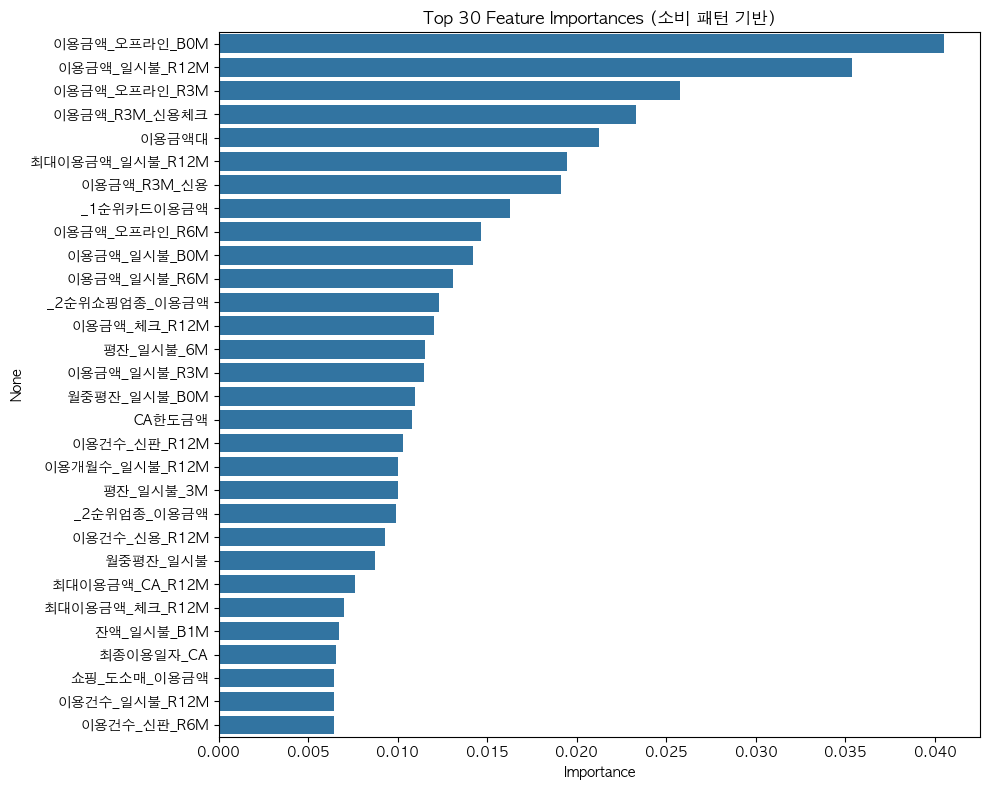

In [29]:
# 필요 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 0. 한글 폰트 설정 (예: 'Malgun Gothic' 또는 시스템에 있는 다른 폰트)
# plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['font.family'] = 'AppleGothic'  # Mac
# plt.rcParams['font.family'] = 'NanumGothic'  # Ubuntu에 설치했을 경우

# 0. 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 1. 주요 컬럼 필터링
focus_cols = [col for col in df_filtered.columns if any(key in col for key in [
    '이용건수', '이용금액', '일시불', '할부', 'CA', '카드론', '체크', '쇼핑', '교통', '여유', '납부', '최다이용업종'
])]

X = df_filtered[focus_cols]
y = df_filtered['Segment']  # 대소문자 주의: 'Segment' 컬럼

# 2. 인코딩
X_encoded = pd.get_dummies(X)

# 3. 학습/검증 세트 분리
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# 4. 랜덤포레스트 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 5. 중요 피처 시각화
importances = pd.Series(clf.feature_importances_, index=X_encoded.columns)
top_features = importances.sort_values(ascending=False).head(30)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 30 Feature Importances (소비 패턴 기반)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [137]:
top_features_list = list(top_features.index)
print(top_features_list)

['이용금액_오프라인_B0M', '이용금액_일시불_R12M', '이용금액_오프라인_R3M', '이용금액_R3M_신용체크', '이용금액대', '최대이용금액_일시불_R12M', '이용금액_R3M_신용', '_1순위카드이용금액', '이용금액_오프라인_R6M', '이용금액_일시불_B0M', '이용금액_일시불_R6M', '_2순위쇼핑업종_이용금액', '이용금액_체크_R12M', '평잔_일시불_6M', '이용금액_일시불_R3M', '월중평잔_일시불_B0M', 'CA한도금액', '이용건수_신판_R12M', '이용개월수_일시불_R12M', '평잔_일시불_3M', '_2순위업종_이용금액', '이용건수_신용_R12M', '월중평잔_일시불', '최대이용금액_CA_R12M', '최대이용금액_체크_R12M', '잔액_일시불_B1M', '최종이용일자_CA', '쇼핑_도소매_이용금액', '이용건수_일시불_R12M', '이용건수_신판_R6M']


In [49]:
top_features.name = "Feature"

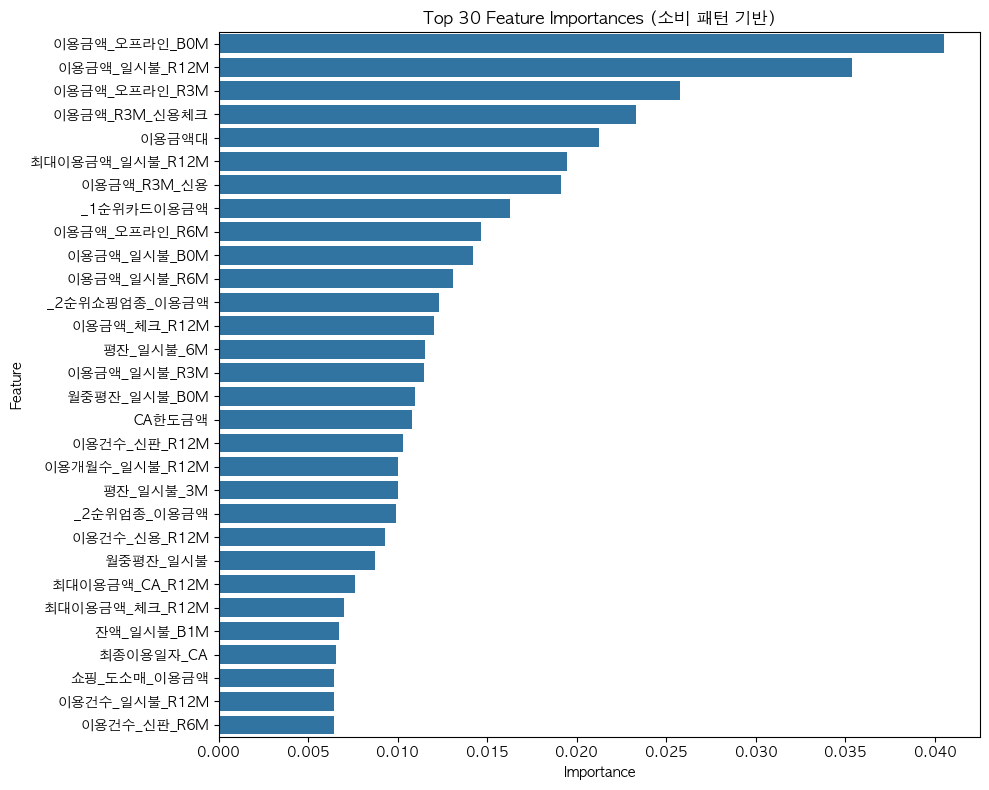

In [51]:
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 30 Feature Importances (소비 패턴 기반)")
plt.xlabel("Importance")
plt.ylabel("Feature")  # y축 라벨 직접 명시
plt.tight_layout()
plt.show()

In [61]:
# top_features 기준으로 학습용 데이터 재구성
X_train_selected = X_train[top_features.index]
X_val_selected = X_val[top_features.index]

# 분류기 다시 학습
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_selected, y_train)

# 예측 및 평가
y_pred = clf.predict(X_val_selected)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         1
           2       0.65      0.44      0.53       750
           3       0.62      0.58      0.60      2054
           4       0.93      0.96      0.94     11301

    accuracy                           0.87     14112
   macro avg       0.44      0.40      0.41     14112
weighted avg       0.87      0.87      0.87     14112

[[    0     0     6     0     0]
 [    0     0     1     0     0]
 [    1     0   331   308   110]
 [    0     0   125  1184   745]
 [    0     0    45   429 10827]]


/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 클래스 불균형 보정
#### 1. RandomForestClassifier에 class_weight='balanced' 옵션 추가  XX

In [66]:
# top_features 기준으로 학습용 데이터 재구성
X_train_selected = X_train[top_features.index]
X_val_selected = X_val[top_features.index]

# 분류기 다시 학습
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train_selected, y_train)

# 예측 및 평가
y_pred = clf.predict(X_val_selected)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         1
           2       0.65      0.45      0.53       750
           3       0.62      0.52      0.57      2054
           4       0.92      0.96      0.94     11301

    accuracy                           0.87     14112
   macro avg       0.44      0.39      0.41     14112
weighted avg       0.86      0.87      0.86     14112

[[    0     0     6     0     0]
 [    0     0     1     0     0]
 [    0     0   335   279   136]
 [    0     0   125  1072   857]
 [    0     0    46   385 10870]]


/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 2. 리샘플링 (이거임)

데이터 로딩 시작...
데이터 로딩 완료: 1.48초
Train 데이터 크기: (70560, 738)
Test 데이터 크기: (1440, 737)
데이터 전처리 시작...
데이터 전처리 완료: 0.54초
데이터 스케일링 중...
클래스 분포: {'A': 28, 'B': 4, 'C': 3753, 'D': 10270, 'E': 56505}
리샘플링 시작...
큰 데이터셋 감지 - 빠른 리샘플링 적용
리샘플링 완료: 0.02초
리샘플링 후 데이터 크기: (282525, 30)
모델 훈련 시작...
스태킹 모델 훈련 중...
모델 훈련 완료: 468.46초
모델 평가 중...
Classification Report:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00     11301
           B       1.00      1.00      1.00     11301
           C       0.99      0.98      0.99     11301
           D       0.90      0.95      0.92     11301
           E       0.95      0.90      0.92     11301

    accuracy                           0.97     56505
   macro avg       0.97      0.97      0.97     56505
weighted avg       0.97      0.97      0.97     56505

Confusion Matrix:


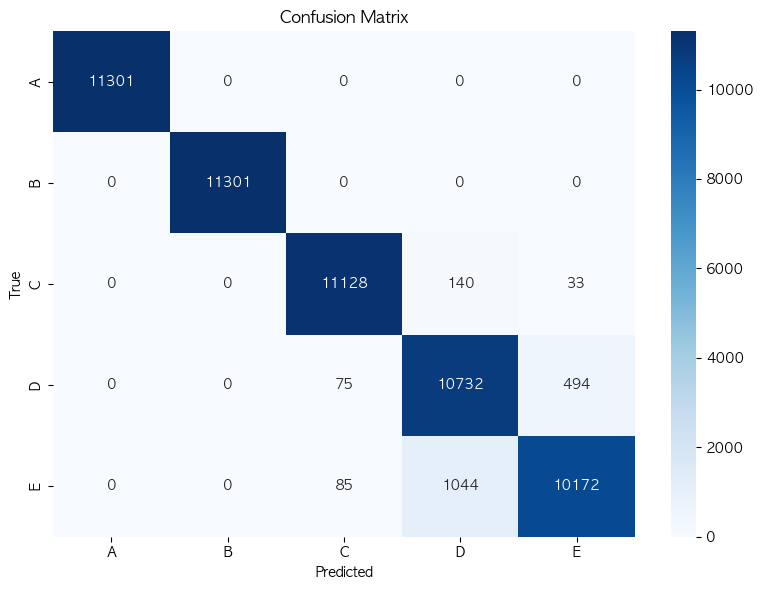

모델 평가 완료: 0.55초
테스트셋 예측 중...
예측 완료: 0.07초
총 실행 시간: 471.14초
제출 파일 생성 완료: 'card_test_submission.csv'
메모리 사용량: 939.36 MB


In [188]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time

# 1. 데이터 불러오기
print("데이터 로딩 시작...")
start_time = time.time()

train_path = 'segment_dataset/card_train.csv'
test_path = 'segment_dataset/card_test.csv'
submission_path = 'segment_dataset/card_test_submission.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submission_df = pd.read_csv(submission_path)

print(f"데이터 로딩 완료: {time.time() - start_time:.2f}초")
print(f"Train 데이터 크기: {train_df.shape}")
print(f"Test 데이터 크기: {test_df.shape}")

# 2. 타겟 및 특징 변수 지정
target_col = 'Segment'
top_features = [
    '이용금액_오프라인_B0M', '이용금액_일시불_R12M', '이용금액_오프라인_R3M',
    '이용금액_R3M_신용체크', '이용금액대', '최대이용금액_일시불_R12M', '이용금액_R3M_신용',
    '_1순위카드이용금액', '이용금액_오프라인_R6M', '이용금액_일시불_B0M',
    '이용금액_일시불_R6M', '_2순위쇼핑업종_이용금액', '이용금액_체크_R12M',
    '평잔_일시불_6M', '이용금액_일시불_R3M', '월중평잔_일시불_B0M', 'CA한도금액',
    '이용건수_신판_R12M', '이용개월수_일시불_R12M', '평잔_일시불_3M',
    '_2순위업종_이용금액', '이용건수_신용_R12M', '월중평잔_일시불',
    '최대이용금액_CA_R12M', '최대이용금액_체크_R12M', '잔액_일시불_B1M',
    '최종이용일자_CA', '쇼핑_도소매_이용금액', '이용건수_일시불_R12M',
    '이용건수_신판_R6M'
]

# 3. 최적화된 숫자형 변환 함수
def to_numeric_vectorized(series):
    """벡터화된 숫자 변환 함수 (범주형 문자열 예외 처리 포함)"""
    # 문자열 처리 마스크 (예: '만원', ',', '-', 공백 포함)
    str_mask = series.astype(str).str.contains('만원|,|-', na=False)
    
    # 복사본 생성
    result = series.copy()

    try:
        # 문자열 처리가 필요한 부분만 전처리
        if str_mask.any():
            str_series = series[str_mask].astype(str)
            str_series = str_series.str.replace('만원', '', regex=False)
            str_series = str_series.str.replace('-', '', regex=False) 
            str_series = str_series.str.replace(',', '', regex=False)
            str_series = str_series.str.strip()
            result[str_mask] = pd.to_numeric(str_series, errors='coerce')

        # 전체 시리즈를 숫자로 변환 (숫자인 경우 그대로 유지, 아닌 경우 NaN 처리)
        result = pd.to_numeric(result, errors='coerce')
    
    except Exception as e:
        print(f"예외 발생 - {series.name}: {e}")
        result = pd.Series([0.0]*len(series))
    
    return result.fillna(0.0)

# 4. 데이터 전처리 (수정된 부분)
print("데이터 전처리 시작...")
preprocess_start = time.time()  # 이 변수가 빠져있었음

for col in top_features:
    if col in train_df.columns:
        train_df[col] = to_numeric_vectorized(train_df[col])
        test_df[col] = to_numeric_vectorized(test_df[col])

print(f"데이터 전처리 완료: {time.time() - preprocess_start:.2f}초")

# 5. X, y 분리
X_train_full = train_df[top_features].copy()
y_train_full = train_df[target_col].copy()
X_test = test_df[top_features].copy()

# 스케일링 (스케일링된 데이터를 사용하도록 수정)
print("데이터 스케일링 중...")
scaler = StandardScaler()
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

# DataFrame으로 다시 변환 (컬럼명 유지)
X_train_full = pd.DataFrame(X_train_full_scaled, columns=top_features)
X_test = pd.DataFrame(X_test_scaled, columns=top_features)

# 6. Label Encoding
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_full)
print(f"클래스 분포: {dict(zip(le.classes_, np.bincount(y_train_enc)))}")

# 7. 데이터 크기에 따른 샘플링 전략
print("리샘플링 시작...")
resample_start = time.time()

# 데이터가 크면 ADASYN 대신 더 빠른 방법 사용
if len(X_train_full) > 50000:
    print("큰 데이터셋 감지 - 빠른 리샘플링 적용")
    from imblearn.over_sampling import RandomOverSampler
    sampler = RandomOverSampler(random_state=42)
else:
    print("ADASYN 적용")
    # n_neighbors를 더 안전하게 설정
    n_neighbors = min(5, max(1, len(X_train_full)//20))  # 최소 1개 보장
    sampler = ADASYN(random_state=42, n_neighbors=n_neighbors)

X_resampled, y_resampled = sampler.fit_resample(X_train_full, y_train_enc)
print(f"리샘플링 완료: {time.time() - resample_start:.2f}초")
print(f"리샘플링 후 데이터 크기: {X_resampled.shape}")

# 8. 최적화된 스태킹 앙상블 모델
print("모델 훈련 시작...")
model_start = time.time()

# 하이퍼파라미터 최적화 (속도 vs 성능 균형)
estimators = [
    ('rf', RandomForestClassifier(
        n_estimators=50,  # 100에서 50으로 감소
        max_depth=15,     # 깊이 제한으로 과적합 방지 및 속도 향상
        random_state=42,
        n_jobs=-1         # 병렬 처리
    )),
    ('gb', GradientBoostingClassifier(
        n_estimators=50,  # 100에서 50으로 감소
        max_depth=6,      # 깊이 제한
        learning_rate=0.1,
        random_state=42
    )),
    ('lr', LogisticRegression(
        max_iter=2000,    # 8000에서 2000으로 감소
        random_state=42,
        n_jobs=-1
    ))
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=2000, random_state=42),  # solver 제거
    cv=3,              # 5에서 3으로 감소 (속도 향상)
    n_jobs=-1,
    passthrough=False
)

# 9. 학습 및 검증
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 메모리 최적화를 위해 원본 리샘플링 데이터 삭제
del X_resampled, y_resampled

print("스태킹 모델 훈련 중...")
stacking_clf.fit(X_train, y_train)

print(f"모델 훈련 완료: {time.time() - model_start:.2f}초")

# 10. 모델 평가
print("모델 평가 중...")
eval_start = time.time()

y_pred = stacking_clf.predict(X_val)
print("Classification Report:\n", classification_report(y_val, y_pred, target_names=le.classes_))

print("Confusion Matrix:")
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()  # 레이아웃 최적화
plt.show()

print(f"모델 평가 완료: {time.time() - eval_start:.2f}초")

# 11. 테스트셋 예측 및 제출 파일 생성
print("테스트셋 예측 중...")
pred_start = time.time()

y_test_pred = stacking_clf.predict(X_test)
submission_df['Segment'] = le.inverse_transform(y_test_pred)
submission_df.to_csv('card_test_submission.csv', index=False)

print(f"예측 완료: {time.time() - pred_start:.2f}초")
print(f"총 실행 시간: {time.time() - start_time:.2f}초")
print("제출 파일 생성 완료: 'card_test_submission.csv'")

# 메모리 사용량 확인 (선택사항)
try:
    import psutil
    import os
    process = psutil.Process(os.getpid())
    memory_info = process.memory_info()
    print(f"메모리 사용량: {memory_info.rss / 1024 / 1024:.2f} MB")
except ImportError:
    print("psutil이 설치되지 않아 메모리 사용량을 확인할 수 없습니다.")

#### 2. One-vs-Rest + RandomForest

OneVsRest RandomForest 결과:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11301
           1       1.00      1.00      1.00     11301
           2       0.98      0.93      0.96     11301
           3       0.85      0.95      0.89     11301
           4       0.94      0.88      0.91     11301

    accuracy                           0.95     56505
   macro avg       0.95      0.95      0.95     56505
weighted avg       0.95      0.95      0.95     56505


=== 성능 비교 ===
기존 스태킹 모델 정확도: 97%
OneVsRest 모델 정확도: 95.19%


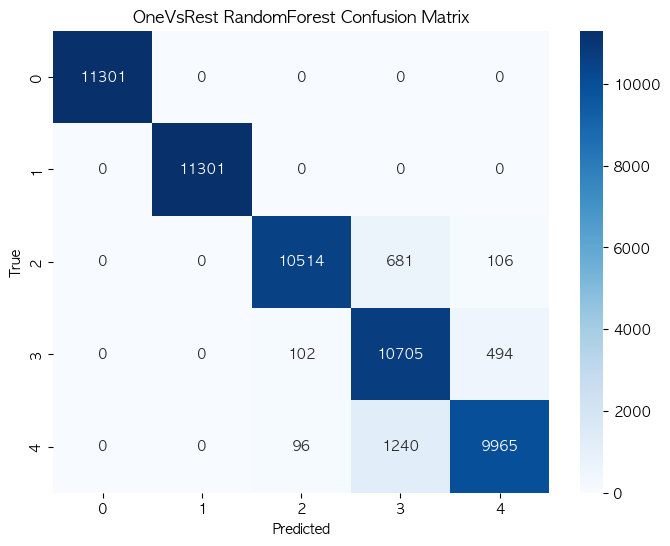


=== 다양한 OneVsRest 분류기 비교 ===
OneVsRest + LogisticRegression 정확도: 81.68%
OneVsRest + GradientBoosting 정확도: 84.04%


In [194]:
# 방법 1: 올바른 변수명 사용 (가장 간단한 해결책)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# OneVsRest 분류기 정의
ovr_rf = OneVsRestClassifier(
    RandomForestClassifier(
        n_estimators=100,           # 성능 향상을 위해 증가
        random_state=42, 
        class_weight='balanced',    # 클래스 불균형 처리
        n_jobs=-1,
        max_depth=15               # 과적합 방지
    )
)

# 모델 훈련 (올바른 변수명 사용)
ovr_rf.fit(X_train, y_train)  # X_train_resampled 대신 X_train 사용

# 예측 (올바른 변수명 사용)
y_pred_ovr_rf = ovr_rf.predict(X_val)  # X_val_selected 대신 X_val 사용

# 평가
print("OneVsRest RandomForest 결과:")
print(classification_report(y_val, y_pred_ovr_rf))

# 방법 2: 만약 X_val_selected가 특성 선택된 데이터라면
# 동일하게 특성 선택을 적용해야 함
"""
# 예시: 만약 특성 선택을 했다면
from sklearn.feature_selection import SelectKBest, f_classif

# 특성 선택기 정의 및 훈련
selector = SelectKBest(f_classif, k=20)  # 상위 20개 특성 선택
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# OneVsRest 모델 훈련
ovr_rf_selected = OneVsRestClassifier(
    RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
)
ovr_rf_selected.fit(X_train_selected, y_train)

# 예측 및 평가
y_pred_ovr_rf_selected = ovr_rf_selected.predict(X_val_selected)
print("특성 선택 후 OneVsRest 결과:")
print(classification_report(y_val, y_pred_ovr_rf_selected))
"""

# 방법 3: 기존 스태킹 모델과 성능 비교
print("\n=== 성능 비교 ===")
print("기존 스태킹 모델 정확도: 97%")

# OneVsRest 정확도 계산
from sklearn.metrics import accuracy_score
ovr_accuracy = accuracy_score(y_val, y_pred_ovr_rf)
print(f"OneVsRest 모델 정확도: {ovr_accuracy:.2%}")

# 클래스별 성능 비교를 위한 혼동 행렬
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_ovr = confusion_matrix(y_val, y_pred_ovr_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ovr, annot=True, fmt='d', cmap='Blues')
plt.title('OneVsRest RandomForest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 방법 4: 다른 기본 분류기들과 OneVsRest 비교
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

print("\n=== 다양한 OneVsRest 분류기 비교 ===")

# OneVsRest + LogisticRegression
ovr_lr = OneVsRestClassifier(
    LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
)
ovr_lr.fit(X_train, y_train)
y_pred_ovr_lr = ovr_lr.predict(X_val)
ovr_lr_accuracy = accuracy_score(y_val, y_pred_ovr_lr)
print(f"OneVsRest + LogisticRegression 정확도: {ovr_lr_accuracy:.2%}")

# OneVsRest + GradientBoosting
ovr_gb = OneVsRestClassifier(
    GradientBoostingClassifier(random_state=42, n_estimators=50)
)
ovr_gb.fit(X_train, y_train)
y_pred_ovr_gb = ovr_gb.predict(X_val)
ovr_gb_accuracy = accuracy_score(y_val, y_pred_ovr_gb)
print(f"OneVsRest + GradientBoosting 정확도: {ovr_gb_accuracy:.2%}")

#### 4. Stacking 앙상블

In [117]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 1. 클래스별 가중치 계산 (CatBoost 전용)
classes = np.unique(y_train_resampled)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_resampled)
class_weights_dict = dict(zip(classes, weights))

# 2. Base 모델 정의
base_models = [
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('lgbm', LGBMClassifier(random_state=42)),
    ('catboost', CatBoostClassifier(random_state=42, verbose=False, class_weights=class_weights_dict)),
    ('rf_ovr', OneVsRestClassifier(RandomForestClassifier(random_state=42)))
]

# 3. Meta 모델 (Level-1)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# 4. 스태킹 앙상블 정의
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,  # 내부 교차검증
    n_jobs=-1,
    passthrough=False  # base 모델의 입력 features는 사용하지 않음
)

# 5. 학습
stack_model.fit(X_train_resampled, y_train_resampled)

# 6. 평가
y_pred_stack = stack_model.predict(X_val_selected)
print("📊 Stacking Ensemble Model:\n")
print(classification_report(y_val, y_pred_stack))


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[15:57:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:57:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:57:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:57:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:57:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.215749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7159
[LightGBM] [Info] Number of data points in the train set: 180816, number of used features: 30
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.245996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7159
[LightGBM] [Info] Start training from score -1.609443
[LightGBM] [Info] Number of data points in the train set: 180816, number of used features: 30
[LightGBM] [Info] Start training from score -1.609443
[LightGBM] [Info] Start training from score -1.609443
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.247610 seconds.
You can set `force_row_wis

/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [128]:
# ID, Segment.1 컬럼 제외
drop_cols = ['ID', 'Segment.1']
X_train_selected = X_train_selected.drop(columns=[col for col in drop_cols if col in X_train_selected.columns])
X_val_selected = X_val_selected.drop(columns=[col for col in drop_cols if col in X_val_selected.columns])


#### --번외-- SMOTE + 스태킹 앙상블 (불균형 )

In [135]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# 데이터 준비 가정: X, y, top_features
# top_features.index: 상위 30개 중요 변수 리스트

# 1. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X[top_features.index], y, stratify=y, test_size=0.2, random_state=42
)

# 2. SMOTE 적용
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE: {np.bincount(y_train)}")
print(f"After SMOTE: {np.bincount(y_train_smote)}")

# 3. Base 모델 정의
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
lgb = LGBMClassifier(random_state=42)

base_models = [rf, xgb, lgb]

# 4. Base 모델 학습
for model in base_models:
    model.fit(X_train_smote, y_train_smote)

# 5. 메타 학습용 feature 생성 함수
def get_base_model_preds(models, X):
    preds = []
    for model in models:
        probas = model.predict_proba(X)
        preds.append(probas)
    return np.hstack(preds)

# 6. 메타 학습 데이터 생성
X_meta_train = get_base_model_preds(base_models, X_train_smote)
X_meta_test = get_base_model_preds(base_models, X_test)

# 7. 메타 모델 학습 (Logistic Regression)
meta_model = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
meta_model.fit(X_meta_train, y_train_smote)

# 8. 최종 예측 및 평가
y_pred = meta_model.predict(X_meta_test)

print("===== Stacking Ensemble + SMOTE + top_30 Feature 결과 =====")
print(classification_report(y_test, y_pred))


Before SMOTE: [   22     3  3003  8216 45204]
After SMOTE: [45204 45204 45204 45204 45204]


/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:27:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7159
[LightGBM] [Info] Number of data points in the train set: 226020, number of used features: 30
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


===== Stacking Ensemble + SMOTE + top_30 Feature 결과 =====
              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.00      0.00      0.00         1
           2       0.61      0.52      0.56       750
           3       0.56      0.63      0.60      2054
           4       0.94      0.93      0.94     11301

    accuracy                           0.86     14112
   macro avg       0.52      0.45      0.47     14112
weighted avg       0.87      0.86      0.87     14112



/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 클래스 균형

In [198]:
# 부스팅 모델 학습 (수정된 버전)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score

print("=== 부스팅 모델 학습 및 평가 ===\n")

# 방법 1: 기본 부스팅 모델들 (변수명 수정)
print("1. 기본 부스팅 모델들:")

# XGBoost
xgb = XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='mlogloss',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1
)
xgb.fit(X_train, y_train)  # 올바른 변수명 사용
y_pred_xgb = xgb.predict(X_val)  # 올바른 변수명 사용
xgb_accuracy = accuracy_score(y_val, y_pred_xgb)
print(f"XGBoost 정확도: {xgb_accuracy:.2%}")
print("XGBoost 상세 결과:")
print(classification_report(y_val, y_pred_xgb))

# LightGBM
lgbm = LGBMClassifier(
    random_state=42, 
    class_weight='balanced',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    verbose=-1  # 경고 메시지 숨김
)
lgbm.fit(X_train, y_train)  # 올바른 변수명 사용
y_pred_lgbm = lgbm.predict(X_val)  # 올바른 변수명 사용
lgbm_accuracy = accuracy_score(y_val, y_pred_lgbm)
print(f"LightGBM 정확도: {lgbm_accuracy:.2%}")
print("LightGBM 상세 결과:")
print(classification_report(y_val, y_pred_lgbm))

# CatBoost
cat = CatBoostClassifier(
    random_state=42, 
    verbose=False, 
    auto_class_weights='Balanced',  # CatBoost는 auto_class_weights 사용
    iterations=100,
    depth=6,
    learning_rate=0.1
)
cat.fit(X_train, y_train)  # 올바른 변수명 사용
y_pred_cat = cat.predict(X_val)  # 올바른 변수명 사용
cat_accuracy = accuracy_score(y_val, y_pred_cat)
print(f"CatBoost 정확도: {cat_accuracy:.2%}")
print("CatBoost 상세 결과:")
print(classification_report(y_val, y_pred_cat))

print("\n" + "="*50)

# 방법 2: OneVsRest 래퍼를 사용한 부스팅 모델들
print("2. OneVsRest + 부스팅 모델들:")

# OneVsRest + XGBoost
ovr_xgb = OneVsRestClassifier(
    XGBClassifier(
        random_state=42, 
        use_label_encoder=False, 
        eval_metric='mlogloss',
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1
    )
)
ovr_xgb.fit(X_train, y_train)
y_pred_ovr_xgb = ovr_xgb.predict(X_val)
ovr_xgb_accuracy = accuracy_score(y_val, y_pred_ovr_xgb)
print(f"OneVsRest + XGBoost 정확도: {ovr_xgb_accuracy:.2%}")
print("OneVsRest + XGBoost 상세 결과:")
print(classification_report(y_val, y_pred_ovr_xgb))

# OneVsRest + LightGBM
ovr_lgbm = OneVsRestClassifier(
    LGBMClassifier(
        random_state=42, 
        class_weight='balanced',
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        verbose=-1
    )
)
ovr_lgbm.fit(X_train, y_train)
y_pred_ovr_lgbm = ovr_lgbm.predict(X_val)
ovr_lgbm_accuracy = accuracy_score(y_val, y_pred_ovr_lgbm)
print(f"OneVsRest + LightGBM 정확도: {ovr_lgbm_accuracy:.2%}")
print("OneVsRest + LightGBM 상세 결과:")
print(classification_report(y_val, y_pred_ovr_lgbm))

# OneVsRest + CatBoost
ovr_cat = OneVsRestClassifier(
    CatBoostClassifier(
        random_state=42, 
        verbose=False, 
        auto_class_weights='Balanced',  # CatBoost는 auto_class_weights 사용
        iterations=100,
        depth=6,
        learning_rate=0.1
    )
)
ovr_cat.fit(X_train, y_train)
y_pred_ovr_cat = ovr_cat.predict(X_val)
ovr_cat_accuracy = accuracy_score(y_val, y_pred_ovr_cat)
print(f"OneVsRest + CatBoost 정확도: {ovr_cat_accuracy:.2%}")
print("OneVsRest + CatBoost 상세 결과:")
print(classification_report(y_val, y_pred_ovr_cat))

print("\n" + "="*50)

# 방법 3: 성능 비교 요약
print("3. 모든 모델 성능 비교:")
results = {
    "XGBoost": xgb_accuracy,
    "LightGBM": lgbm_accuracy,
    "CatBoost": cat_accuracy,
    "OneVsRest + XGBoost": ovr_xgb_accuracy,
    "OneVsRest + LightGBM": ovr_lgbm_accuracy,
    "OneVsRest + CatBoost": ovr_cat_accuracy
}

for model_name, accuracy in results.items():
    print(f"{model_name:25}: {accuracy:.2%}")

# 최고 성능 모델 찾기
best_model = max(results, key=results.get)
best_accuracy = results[best_model]
print(f"\n최고 성능 모델: {best_model} ({best_accuracy:.2%})")

# 방법 4: 특성 선택을 사용한 경우 (주석 처리된 예시)
"""
# 만약 특성 선택을 사용하고 싶다면:
from sklearn.feature_selection import SelectKBest, f_classif

# 특성 선택
selector = SelectKBest(f_classif, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# 특성 선택된 데이터로 XGBoost 학습
xgb_selected = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_selected.fit(X_train_selected, y_train)
y_pred_xgb_selected = xgb_selected.predict(X_val_selected)
print("특성 선택 후 XGBoost:")
print(classification_report(y_val, y_pred_xgb_selected))
"""

=== 부스팅 모델 학습 및 평가 ===

1. 기본 부스팅 모델들:


/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [07:48:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost 정확도: 89.97%
XGBoost 상세 결과:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11301
           1       1.00      1.00      1.00     11301
           2       0.87      0.83      0.85     11301
           3       0.75      0.80      0.77     11301
           4       0.89      0.87      0.88     11301

    accuracy                           0.90     56505
   macro avg       0.90      0.90      0.90     56505
weighted avg       0.90      0.90      0.90     56505

LightGBM 정확도: 91.01%
LightGBM 상세 결과:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11301
           1       1.00      1.00      1.00     11301
           2       0.88      0.86      0.87     11301
           3       0.78      0.81      0.80     11301
           4       0.90      0.88      0.89     11301

    accuracy                           0.91     56505
   macro avg       0.91      0.91      0.91     56505
weigh

/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [07:48:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [07:48:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [07:48:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [07:48:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" }

OneVsRest + XGBoost 정확도: 90.00%
OneVsRest + XGBoost 상세 결과:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11301
           1       1.00      1.00      1.00     11301
           2       0.86      0.83      0.84     11301
           3       0.76      0.80      0.78     11301
           4       0.89      0.88      0.88     11301

    accuracy                           0.90     56505
   macro avg       0.90      0.90      0.90     56505
weighted avg       0.90      0.90      0.90     56505

OneVsRest + LightGBM 정확도: 89.08%
OneVsRest + LightGBM 상세 결과:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11301
           1       1.00      1.00      1.00     11301
           2       0.85      0.80      0.82     11301
           3       0.73      0.78      0.75     11301
           4       0.88      0.87      0.88     11301

    accuracy                           0.89     56505
   macro av

'\n# 만약 특성 선택을 사용하고 싶다면:\nfrom sklearn.feature_selection import SelectKBest, f_classif\n\n# 특성 선택\nselector = SelectKBest(f_classif, k=20)\nX_train_selected = selector.fit_transform(X_train, y_train)\nX_val_selected = selector.transform(X_val)\n\n# 특성 선택된 데이터로 XGBoost 학습\nxgb_selected = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric=\'mlogloss\')\nxgb_selected.fit(X_train_selected, y_train)\ny_pred_xgb_selected = xgb_selected.predict(X_val_selected)\nprint("특성 선택 후 XGBoost:")\nprint(classification_report(y_val, y_pred_xgb_selected))\n'

#### 5. Soft Voting vs OneVsRest 성능 비교

In [213]:
# Soft Voting vs OneVsRest 성능 비교
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
import time

print("=== Soft Voting vs OneVsRest 성능 비교 ===\n")

# 1. 개별 모델들 정의
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
lgbm = LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
cat = CatBoostClassifier(iterations=100, random_state=42, verbose=False, auto_class_weights='Balanced')

print("1. 개별 모델 성능:")
models = {'RandomForest': rf, 'XGBoost': xgb, 'LightGBM': lgbm, 'CatBoost': cat}
individual_results = {}
individual_times = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, pred)
    train_time = time.time() - start_time
    
    individual_results[name] = accuracy
    individual_times[name] = train_time
    print(f"{name:15}: {accuracy:.4f} (훈련시간: {train_time:.2f}초)")

print("\n" + "="*60)

# 2. Soft Voting 앙상블
print("2. Soft Voting 앙상블:")

# Hard Voting (다수결)
hard_voting = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)),
        ('xgb', XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
        ('lgbm', LGBMClassifier(n_estimators=100, random_state=42, verbose=-1))
    ],
    voting='hard'
)

# Soft Voting (확률 기반)
soft_voting = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)),
        ('xgb', XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
        ('lgbm', LGBMClassifier(n_estimators=100, random_state=42, verbose=-1))
    ],
    voting='soft'
)

# Hard Voting 성능
start_time = time.time()
hard_voting.fit(X_train, y_train)
y_pred_hard = hard_voting.predict(X_val)
hard_accuracy = accuracy_score(y_val, y_pred_hard)
hard_time = time.time() - start_time
print(f"Hard Voting   : {hard_accuracy:.4f} (훈련시간: {hard_time:.2f}초)")

# Soft Voting 성능
start_time = time.time()
soft_voting.fit(X_train, y_train)
y_pred_soft = soft_voting.predict(X_val)
soft_accuracy = accuracy_score(y_val, y_pred_soft)
soft_time = time.time() - start_time
print(f"Soft Voting   : {soft_accuracy:.4f} (훈련시간: {soft_time:.2f}초)")

print("\n" + "="*60)

# 3. OneVsRest 전략
print("3. OneVsRest 전략:")

ovr_models = {
    'OVR + RF': OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)),
    'OVR + XGB': OneVsRestClassifier(XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    'OVR + LGBM': OneVsRestClassifier(LGBMClassifier(n_estimators=100, random_state=42, verbose=-1))
}

ovr_results = {}
ovr_times = {}
for name, model in ovr_models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, pred)
    train_time = time.time() - start_time
    
    ovr_results[name] = accuracy
    ovr_times[name] = train_time
    print(f"{name:15}: {accuracy:.4f} (훈련시간: {train_time:.2f}초)")

print("\n" + "="*60)

# 4. 전체 결과 비교
print("4. 전체 성능 순위:")

all_results = {}
all_results.update(individual_results)
all_results['Hard Voting'] = hard_accuracy
all_results['Soft Voting'] = soft_accuracy
all_results.update(ovr_results)

# 성능순으로 정렬
sorted_results = sorted(all_results.items(), key=lambda x: x[1], reverse=True)

print("\n순위  모델명                정확도")
print("-" * 35)
for i, (name, accuracy) in enumerate(sorted_results, 1):
    print(f"{i:2d}.   {name:15s}     {accuracy:.4f}")

# 5. 상세 분석
print(f"\n" + "="*60)
print("5. 상세 분석:")

best_model_name, best_accuracy = sorted_results[0]
print(f"최고 성능: {best_model_name} ({best_accuracy:.4f})")

print(f"\nSoft Voting 개선도:")
baseline_accuracy = max(individual_results.values())
improvement = soft_accuracy - baseline_accuracy
print(f"개별 모델 최고 성능: {baseline_accuracy:.4f}")
print(f"Soft Voting 성능:   {soft_accuracy:.4f}")
print(f"성능 개선:          {improvement:+.4f} ({improvement/baseline_accuracy*100:+.2f}%)")

# 6. 최고 성능 모델의 상세 결과
print(f"\n" + "="*60)
print("6. Soft Voting 상세 결과:")
print(classification_report(y_val, y_pred_soft))

# 메모리 및 시간 효율성 비교
print(f"\n" + "="*60)
print("7. 효율성 비교:")
avg_individual_time = sum(individual_times.values()) / len(individual_times)
avg_ovr_time = sum(ovr_times.values()) / len(ovr_times)

print(f"개별 모델 평균 훈련시간: {avg_individual_time:.2f}초")
print(f"Soft Voting 훈련시간:   {soft_time:.2f}초")
print(f"OneVsRest 평균 훈련시간: {avg_ovr_time:.2f}초")

print(f"\n시간 효율성:")
print(f"Soft Voting이 개별 모델 대비: {soft_time/avg_individual_time:.2f}배")
print(f"OneVsRest가 개별 모델 대비:   {avg_ovr_time/avg_individual_time:.2f}배")

=== Soft Voting vs OneVsRest 성능 비교 ===

1. 개별 모델 성능:
RandomForest   : 0.9860 (훈련시간: 6.17초)


/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:09:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost        : 0.9495 (훈련시간: 2.05초)
LightGBM       : 0.9170 (훈련시간: 2.65초)
CatBoost       : 0.9034 (훈련시간: 3.32초)

2. Soft Voting 앙상블:


/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:09:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Hard Voting   : 0.9532 (훈련시간: 11.05초)


/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Soft Voting   : 0.9735 (훈련시간: 11.13초)

3. OneVsRest 전략:
OVR + RF       : 0.9874 (훈련시간: 22.52초)


/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:09:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:09:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:09:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sumin/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:09:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" }

OVR + XGB      : 0.9517 (훈련시간: 2.30초)
OVR + LGBM     : 0.8988 (훈련시간: 3.78초)

4. 전체 성능 순위:

순위  모델명                정확도
-----------------------------------
 1.   OVR + RF            0.9874
 2.   RandomForest        0.9860
 3.   Soft Voting         0.9735
 4.   Hard Voting         0.9532
 5.   OVR + XGB           0.9517
 6.   XGBoost             0.9495
 7.   LightGBM            0.9170
 8.   CatBoost            0.9034
 9.   OVR + LGBM          0.8988

5. 상세 분석:
최고 성능: OVR + RF (0.9874)

Soft Voting 개선도:
개별 모델 최고 성능: 0.9860
Soft Voting 성능:   0.9735
성능 개선:          -0.0125 (-1.27%)

6. Soft Voting 상세 결과:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11301
           1       1.00      1.00      1.00     11301
           2       0.98      1.00      0.99     11301
           3       0.91      0.97      0.94     11301
           4       0.97      0.90      0.94     11301

    accuracy                           0.97     56505
   macro avg  